In [7]:
'''Last modified 11.02.2016
    Added mongoDB functionality - one can query any data he wants DESCRIBE HOW TO DO THIS
    Pandas table can be used
09.02.2016
Nothing changed, database and pandas functionality should be added!!!
''';

In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
# imports

import sys
import os
par_dir = os.path.split(os.getcwd())[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)
# sys.path.append(r'/Users/artemgolovizin/GitHub')
from scipy.optimize import curve_fit
import inspect
import pickle
import imp
import re
import json
import pandas as pd

from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact, interactive, fixed

import thulium_python_lib.usefull_functions as usfuncs
import thulium_python_lib.image_processing_new as impr

import ipyparallel as ipp
ipp.CompositeError.tb_limit = 1

rc1 = ipp.Client()
lview = rc1.load_balanced_view()
dview = rc1.direct_view()
dview['par_dir'] = par_dir
# with dview.sync_imports():
#     import sys, os    
%px import sys, os
%px if par_dir not in sys.path: sys.path.append(par_dir)
%px import thulium_python_lib.image_processing_new as impr
%px import imp
%px from ipyparallel import bind_kernel; bind_kernel()

import datetime
import pymongo
from pymongo import MongoClient
from bson.objectid import ObjectId

# start mongoDB client (mongod server should be launched)
client = MongoClient('mongodb://192.168.1.15:27017/')
meas_database = client.measData.meas_data

Done importing, module image_processing now


/Users/artemgolovizin/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [10]:
# to reload library on remote and local engine
# %px imp.reload(impr)
# imp.reload(impr)
# imp.reload(usfuncs)

In [19]:
# get data from mongo db and print folders names and dates
coursor = meas_database.find()
coursor = meas_database.find({'date_meas':{'$gte':datetime.datetime(2016,6,7),
                                          '$lte':datetime.datetime(2016,6,10)},
                               'meas_type':'CL'}) #, 'conf_params.A': { '$in': ['0dBm','0dBm/'] }
# { '$in': ['363.5','363.5/'] }
# , 'conf_params.F':{ '$in': ['363.5','363.5/'] }
# , 'meas_type':'T'
data = []
for item in coursor:
    data.append(item.copy())
    data[-1]['avr_table']=pickle.loads(item['avr_table_pickle'])
    del data[-1]['avr_table_pickle']
    print(len(data)-1, 'date=',data[-1]['date_meas'].date(), 'folder=',data[-1]['folder'])
#     print(data[-1]['conf_params'])
#     print(data[-1]['_id'])
#     for key in item:
#         if(key == 'avr_table_pickle'):
#             tables.append(pickle.loads(item[key]))
#             print(key,item[key][-20:])
#         else:
#             print(key,item[key])
    print('\n')

0 date= 2016-06-07 folder= 01 cl l=806.53176/


1 date= 2016-06-07 folder= 02 as 01/


2 date= 2016-06-07 folder= 03 as 01/


3 date= 2016-06-07 folder= 04 as 01 random/


4 date= 2016-06-07 folder= 05 as 03 l=806.59704/


5 date= 2016-06-07 folder= 06 as 03 l=806.70446/


6 date= 2016-06-07 folder= 07 as 06 a=7/


7 date= 2016-06-07 folder= 08 as 03 l=806.78747/


8 date= 2016-06-07 folder= 09 as 08 a = 5/


9 date= 2016-06-07 folder= 10 as 08 a=5/


10 date= 2016-06-07 folder= 11 as 03 l=806.794/


11 date= 2016-06-07 folder= 12 as 03 l=806.82498/


12 date= 2016-06-07 folder= 13 as 12/


13 date= 2016-06-07 folder= 14 as 03 l=806.85597/


14 date= 2016-06-07 folder= 15 as 03 l=806.86573/


15 date= 2016-06-07 folder= 16 as 03 l=806.89995 a=8/


16 date= 2016-06-07 folder= 17 as 03 l=806.81256/


17 date= 2016-06-07 folder= 18 as 17/


18 date= 2016-06-07 folder= 19 as 17/


19 date= 2016-06-07 folder= 20 as 03 l=806.74898/


20 date= 2016-06-07 folder= 21 as 03 l=807.520/


21 date=

In [29]:
s = '806.53176/'

In [33]:
re.findall(r'[-+]?\d*\.\d*',s)[0]

'806.53176'

In [35]:
for d in data:
    l = float(re.findall(r'[-+]?\d*\.\d*',d['conf_params']['L'])[0])
    d['lambda'] = l

In [45]:
points = []
for d in data:
    if len(d['fits']) != 0 :
        points.append((d['lambda'], d['fits'][0][1][1], d['fits'][0][2][1]))

In [51]:
res = array(points)

(416, 417.0)

/Users/artemgolovizin/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


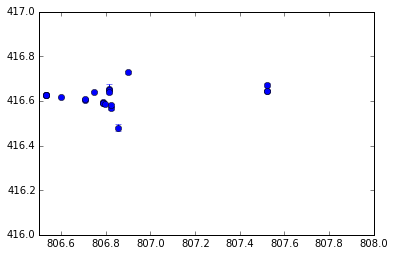

In [57]:
plt.errorbar(res[:,0],res[:,1],res[:,2],fmt='o')
xlim((806.5,808))
ylim(bottom=416)

(416.4, 417)

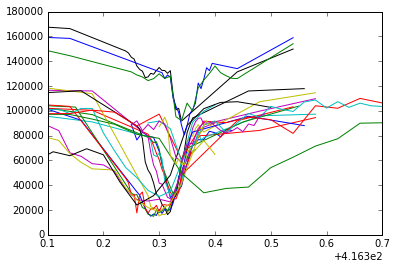

In [69]:
for d in data:
    if d['lambda'] < 808:
        plot(d['avr_table'].folder,d['avr_table'].fit1D_x.N)
xlim((416.4,417))
# ylim(top=380)

In [61]:
data[0]['avr_table'].fit1D_x.x0

0     364.160286
1     364.311096
2     363.821741
3     363.145913
4     363.209549
5     363.823479
6     362.458138
7     363.675801
8     365.561682
9     365.335640
10    363.492621
11    363.977917
12    363.966137
13    364.233150
14    361.401487
15    364.673369
16    362.607911
17    362.700217
18    364.177515
Name: x0, dtype: float64

In [41]:
data[0]['fits'][0][1][1]

416.62731882637195

In [117]:
#meas_database.delete_one({'_id': ObjectId('572cad97f9b7ab269c4d7318')})
#meas_database.delete_one({'_id': data[0]['_id']})

In [105]:
#data[0]['_id']
#int(data[12]['folder'].split()[0])

[10.0, 5.0, 2.0, 0.0, -2.0, -4.0, -6.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0]


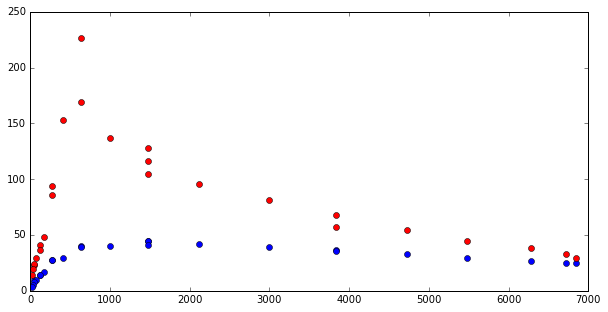

In [80]:
xx1 = []
Ty1 = []
Tx1 = []
Na1 = []
for d in data[37:63]:
    xx1.append(float(re.findall(r"[-+]?\d*\.?\d+",d['conf_params']['A'])[-1]))
    Tx1.append(d['fits'][0][1][0])
    Ty1.append(d['fits'][1][1][0])
    Na1.append(d['avr_table']['fit1D_x']['N'][0])

#xx =  array(xx)
#xx = 2*(364.7 - xx)
print(xx1)
#xx = [8.5,13,13,19,29,44,67,103,160,250,370,530,750,960,1180,1370,1570,1680,1710]
xx1 = [1710,960,370,160,67,29,13,1680,1570,1370,1180,960,750,530,370,370,250,160,103,67,44,29,19,13,8.5,6]
xx1=4*array(xx1)
figsize(10,5)
plot(xx1,Tx1,'bo')
plot(xx1,Ty1,'ro')

[10.0, 10.0, 10.0, 10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, 10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 2.0, 0.0, -2.0, -4.0, -6.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0, -5.0]


ValueError: x and y must have same first dimension

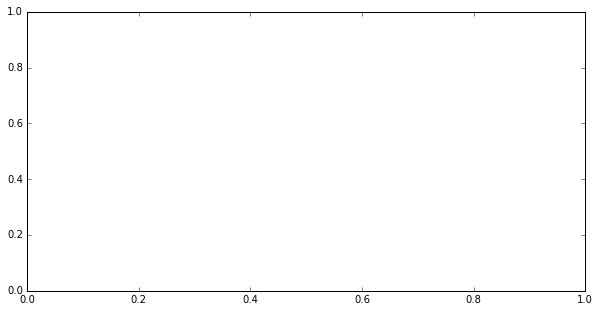

In [71]:
xx = []
Ty = []
Tx = []
Na = []
for d in data:
    xx.append(float(re.findall(r"[-+]?\d*\.?\d+",d['conf_params']['A'])[-1]))
    Tx.append(d['fits'][0][1][0])
    Ty.append(d['fits'][1][1][0])
    Na.append(d['avr_table']['fit1D_x']['N'][0])

#xx =  array(xx)
#xx = 2*(364.7 - xx)
print(xx)
xx = [8.5,13,13,19,29,44,67,103,160,250,370,530,750,960,1180,1370,1570,1680,1710]
figsize(10,5)
plot(xx,Tx,'bo')
plot(xx,Ty,'ro')
plot(xx1,Tx1,'b^')
plot(xx1,Ty1,'r^')

[14.222105291450653, 15.47201854138867, 17.60072943847257, 20.56256942553895]


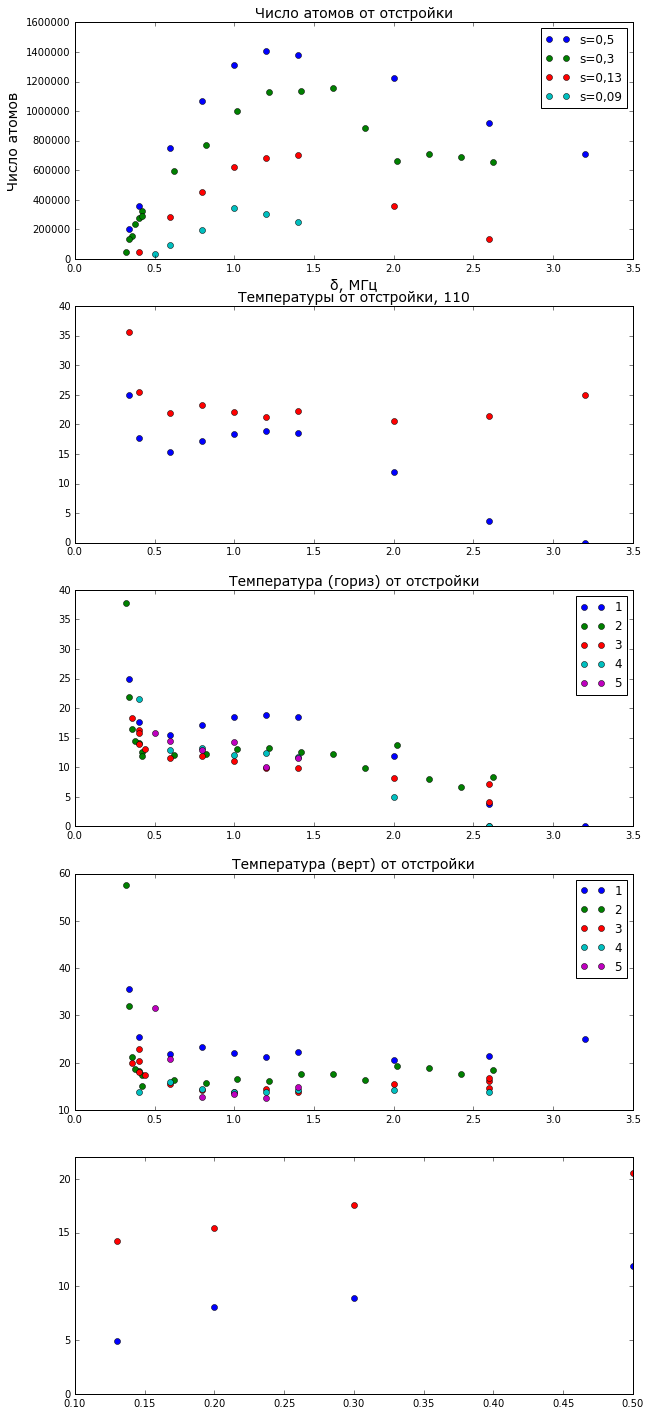

In [245]:
figsize(10,50)
subplot(10,1,1)
plot(xx110,Na110,'o')
plot(xx75,Na75,'o')
#plot(xx46,Na46,'o')
plot(xx30,Na30,'o')
plot(xx20,Na20,'o')
ylim(bottom=0)
xlabel('δ, МГц', fontsize=14, family="verdana")
ylabel('Число атомов', fontsize=14, family="verdana")
title('Число атомов от отстройки',fontsize=14,family='verdana')
legend(['s=0,5','s=0,3','s=0,13','s=0,09'])

subplot(10,1,2)
plot(xx110,Tx110,'bo')
plot(xx110,Ty110,'ro')
title('Температуры от отстройки, 110',fontsize=14,family='verdana')

subplot(10,1,3)
plot(xx110,Tx110,'o')
plot(xx75,Tx75,'o')
plot(xx46,Tx46,'o')
plot(xx30,Tx30,'o')
plot(xx20,Tx20,'o')
ylim(bottom=0)
title('Температура (гориз) от отстройки',fontsize=14,family='verdana')
legend('12345')

subplot(10,1,4)
plot(xx110,Ty110,'o')
plot(xx75,Ty75,'o')
plot(xx46,Ty46,'o')
plot(xx30,Ty30,'o')
plot(xx20,Ty20,'o')
title('Температура (верт) от отстройки',fontsize=14,family='verdana')
legend('12345')

#tmp = Ty75.argsort()
#sortedPeople = people[inds]

#plot(xx110,Ty110)
#plot(xx75,Ty75)
#plot(xx46,Ty46,)
#plot(xx30,Ty30)
#plot(xx20,Ty20)
#legend('12345')

subplot(10,1,5)
xs = [0.13, 0.2,0.3,0.5]
Tx = [Tx30[where(xx30==2)[0][0]],Tx46[where(xx46==2)[0][0]],0.5*Tx75[where(np.isclose(xx75,1.82))[0][0]]+0.5*Tx75[where(np.isclose(xx75,2.22))[0][0]],Tx110[where(xx110==2)[0][0]]]
Ty = [Ty30[where(xx30==2)[0][0]],Ty46[where(xx46==2)[0][0]],0.5*Ty75[where(np.isclose(xx75,1.82))[0][0]]+0.5*Ty75[where(np.isclose(xx75,2.22))[0][0]],Ty110[where(xx110==2)[0][0]]]
plot(xs,Tx,'bo')
plot(xs,Ty,'ro')
ylim(bottom=0)
print(Ty)

In [228]:
where(xx75==2.02)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [209]:
Tx30[where(xx30)==2]

4.904335610055764

In [205]:
#help(sort)


In [ ]:
# Шаблон
xx = []
yy = []
for d in data:
    tbl = d['avr_table']
    x = tbl.folder
    y = tbl.fit1D_x.sigma
    ff = d['fits'][0]
    fit_func = usfuncs.cloud_expansion0
    plot(x,fit_func(x,*ff[1]))
    plot(x,y,'o',label=d['date_meas'])
legend()
ylim(bottom=0)

In [ ]:
os.chdir(r'/Users/artemgolovizin/Downloads/2015_12_01')

In [ ]:
old_ks = dict()

In [ ]:
with open('all_data.txt', 'rb') as handle:
    data = pickle.loads(handle.read())

In [ ]:
data.keys()

In [ ]:
data['01 t']

In [ ]:
with open('all_data.txt', 'rb') as handle:
    data = pickle.loads(handle.read())
shot_typeN = 1
ks = list(data.keys())
ks.sort()
ch_boxes = dict()
ks_n = []
for k in ks:
    # optional - uncomment line below to sift only keys with specific marker, as 'CL'
#    if 'CL' not in k.upper(): continue
    ch_boxes[k]=old_ks.get(k,True)
    ks_n.append(k)
ks = ks_n
fg = None   
def plot_gr(l_pos,**ar):
    fig,ax = subplots() 
    global fg, old_ks
    old_ks = dict()
    for k in ks:
        old_ks[k]=ar[k]
        if ar[k]:
            d1 = impr.get_avr_data(data[k]['data'], shot_typeN, 'fit1D_x',2)
            errorbar(**d1)
#             d1['fmt']='ro'
#             d1['label']='fit1D_x'
#             val=datat[k]
#             x,y=impr.data2_sort(val[0],val[1])
#             # here it's time to modify data
# #             x = mod_from_AOM_to_real_freq(x, k, 420)
#             #x,y = x[1:],y[1:]
#             ax.plot(x,y,'-*',label=k)
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
    #xscale('log')
    #xlabel('Current, A')
    #xlabel('AOM frequency, MHz')
    xlabel('detuning, MHz') #in real frequencyes
    ylabel('atoms number, a.u.')
    ylim(bottom=0)
    #start, end = ax.get_xlim()
    #print(ax.get_xlim())
    #ax.xaxis.set_ticks(arange(start, end, 0.1))
    #axvline(x=l_pos)
    fg = fig
    
ter = interactive(plot_gr,l_pos=(150,250,0.1),**ch_boxes)
ter.box_style='info'
display(ter)

In [ ]:
help(interactive)

###For managing clock line shift and broadening

#### Построение списка сканирования

In [ ]:
res = array(range(-7,7, 1))/10 + 420.1
rr = ''
for x in res:
    rr += str(x) + ' '
print(rr)